# Loading images from the Quick Draw Dataset 2k examples


get the data at https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K

import tensorflow as tf

import os
import pickle
import numpy as np

Using TensorFlow backend.


In [3]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


In [2]:
num_examples_per_class = 2000

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake']

In [3]:
len(classes)

40

## Load the image data from scratch

Only use if you are downloading the raw data and doing it yourself

In [4]:
#This cell is only if you are loading the data from scratch
# get the data 
quickdraws = [np.load("../../data/{}.npy".format(qdraw))[:num_examples_per_class] for qdraw in classes]

# Concat the arrays together
x_data = np.concatenate(quickdraws,axis=0)

x_data.shape

(80000, 784)

In [5]:
np.save('x_data_40_classes_2k.npy',x_data)

## Use this cell to load the premade datasets that I made

In [6]:
x_data = np.load("./x_data_40_classes_2k.npy")

In [7]:
x_data.shape

(80000, 784)

## Lets make some labels for our data

In [8]:
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]

## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
y_data.shape

(80000,)

## lets look at the Images 

In [9]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

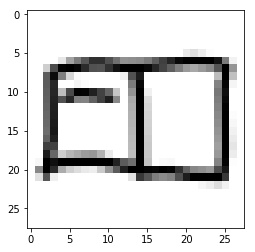

26


In [10]:
show_object(x_data[53000])
print(y_data[53000])

In [11]:
print(x_data.shape)
print(y_data.shape)

(80000, 784)
(80000,)


In [12]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [13]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

In [14]:
y_data[0]

24

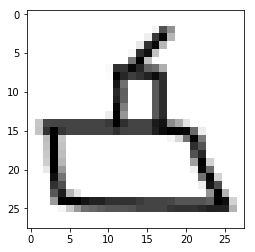

In [15]:
show_object(x_data[0])